**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLLAB/diabetes_dataset00.csv')

In [ ]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [ ]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [ ]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [ ]:
df.shape

(70000, 34)

In [ ]:
df.isnull().sum()

,0
Target,0
Genetic Markers,0
Autoantibodies,0
Family History,0
Environmental Factors,0
Insulin Levels,0
Age,0
BMI,0
Physical Activity,0
Dietary Habits,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Target'].value_counts()

,count
Target,
MODY,5553
Secondary Diabetes,5479
Cystic Fibrosis-Related Diabetes (CFRD),5464
Type 1 Diabetes,5446
Neonatal Diabetes Mellitus (NDM),5408
Wolcott-Rallison Syndrome,5400
Type 2 Diabetes,5397
Prediabetic,5376
Gestational Diabetes,5344


In [ ]:
df['Target'].unique()

array(['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)',
       'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA',
       'Type 2 Diabetes', 'Wolcott-Rallison Syndrome',
       'Secondary Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)',
       'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)',
       'MODY'], dtype=object)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
df[categorical_columns].head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Ethnicity,Socioeconomic Factors,Smoking Status,...,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,High,Healthy,Low Risk,Medium,Smoker,...,Normal,No,No,Normal,No,No,Positive,Normal,Ketones Present,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,High,Healthy,Low Risk,High,Non-Smoker,...,Normal,Yes,No,Normal,Yes,No,Negative,Normal,Glucose Present,Yes
2,Prediabetic,Positive,Positive,Yes,Present,High,Unhealthy,Low Risk,Medium,Smoker,...,Abnormal,Yes,No,Normal,Yes,No,Negative,Abnormal,Ketones Present,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,Low,Unhealthy,Low Risk,High,Smoker,...,Abnormal,No,Yes,Normal,Yes,No,Positive,Abnormal,Ketones Present,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,High,Healthy,Low Risk,Low,Smoker,...,Normal,No,Yes,Complications,No,No,Positive,Normal,Protein Present,No


In [ ]:
df[categorical_columns].columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Physical Activity', 'Dietary Habits',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing',
       'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms'],
      dtype='object')

In [ ]:
len(df[categorical_columns].columns)

21

In [ ]:
for col in categorical_columns:
    print(f"{col} : {df[col].unique()}")

Target : ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY']
Genetic Markers : ['Positive' 'Negative']
Autoantibodies : ['Negative' 'Positive']
Family History : ['No' 'Yes']
Environmental Factors : ['Present' 'Absent']
Physical Activity : ['High' 'Low' 'Moderate']
Dietary Habits : ['Healthy' 'Unhealthy']
Ethnicity : ['Low Risk' 'High Risk']
Socioeconomic Factors : ['Medium' 'High' 'Low']
Smoking Status : ['Smoker' 'Non-Smoker']
Alcohol Consumption : ['High' 'Moderate' 'Low']
Glucose Tolerance Test : ['Normal' 'Abnormal']
History of PCOS : ['No' 'Yes']
Previous Gestational Diabetes : ['No' 'Yes']
Pregnancy History : ['Normal' 'Complications']
Cystic Fibrosis Diagnosis : ['No' 'Yes']
Steroid Use History : ['No' 'Yes']
Genetic Testing 

In [ ]:
df[numerical_columns].head()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
0,40,44,38,124,201,50,168,18,36,76,3,56,2629
1,13,1,17,73,121,24,178,8,26,60,1,28,1881
2,27,36,24,121,185,36,105,15,56,80,1,55,3622
3,8,7,16,100,151,29,121,12,49,89,2,60,3542
4,17,10,17,103,146,33,289,2,10,41,1,24,1770


In [ ]:
df[numerical_columns].columns

Index(['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
       'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight'],
      dtype='object')

In [ ]:
len(df[numerical_columns].columns)

13

In [ ]:
for col in numerical_columns:
    print(f"{col} : {df[col].nunique()}")

Insulin Levels : 45
Age : 80
BMI : 28
Blood Pressure : 90
Cholesterol Levels : 200
Waist Circumference : 35
Blood Glucose Levels : 220
Weight Gain During Pregnancy : 40
Pancreatic Health : 90
Pulmonary Function : 60
Neurological Assessments : 3
Digestive Enzyme Levels : 90
Birth Weight : 3000


In [ ]:
df[numerical_columns].describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


**Data Visualization**

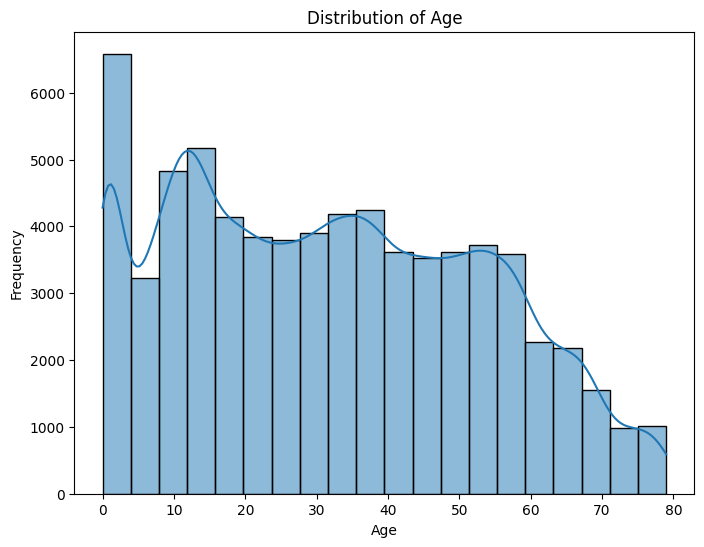

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

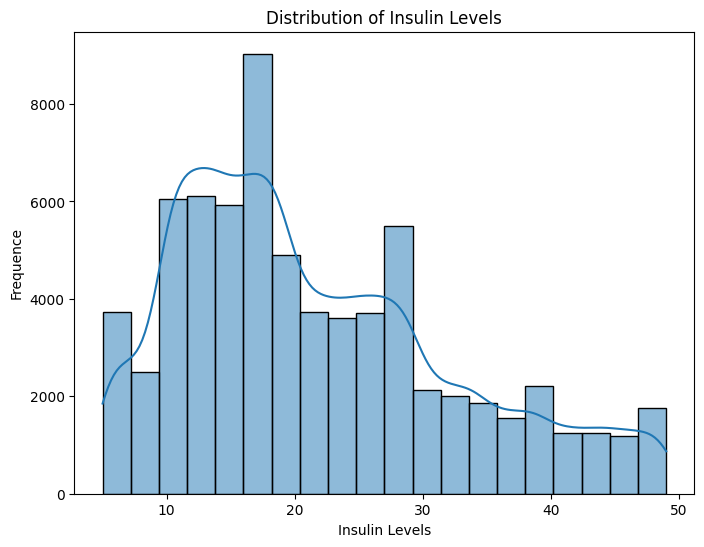

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin Levels'], bins=20, kde=True)
plt.xlabel('Insulin Levels')
plt.title('Distribution of Insulin Levels')
plt.ylabel('Frequence')
plt.show()

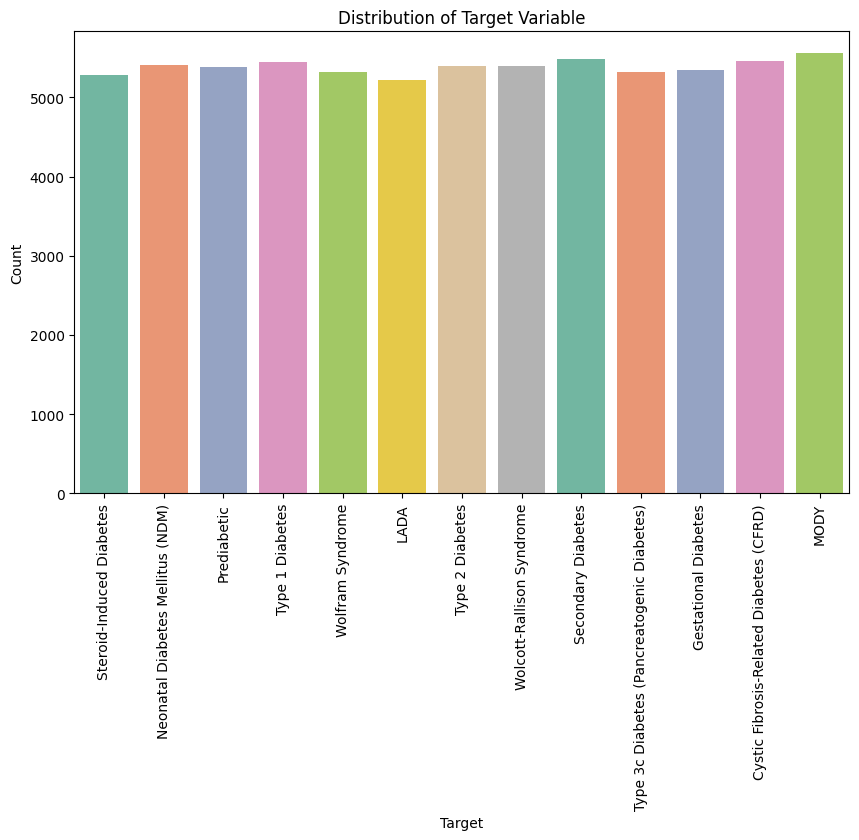

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

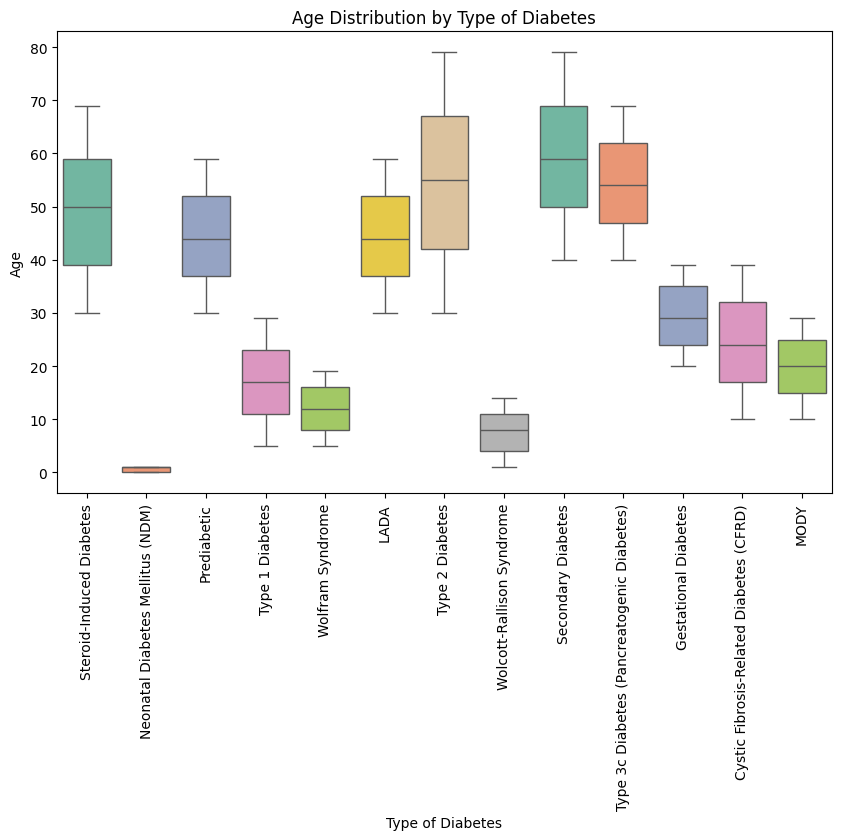

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Type of Diabetes')
plt.xticks(rotation=90)
plt.xlabel('Type of Diabetes')
plt.ylabel('Age')
plt.show()

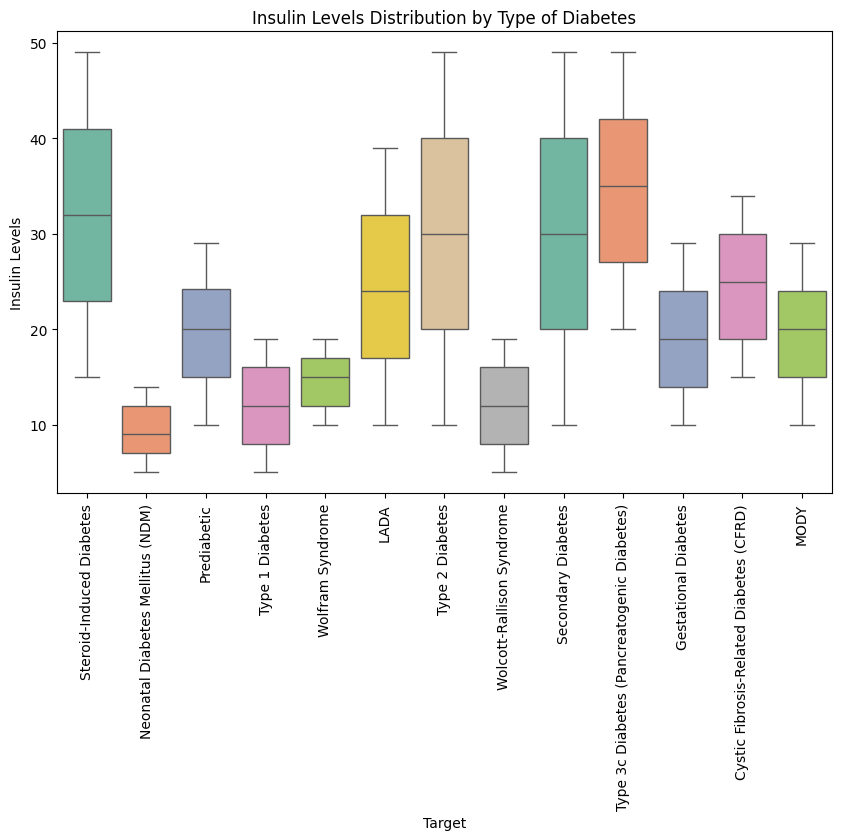

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Insulin Levels', data=df, palette='Set2')
plt.title('Insulin Levels Distribution by Type of Diabetes')
plt.xticks(rotation=90)
plt.show()

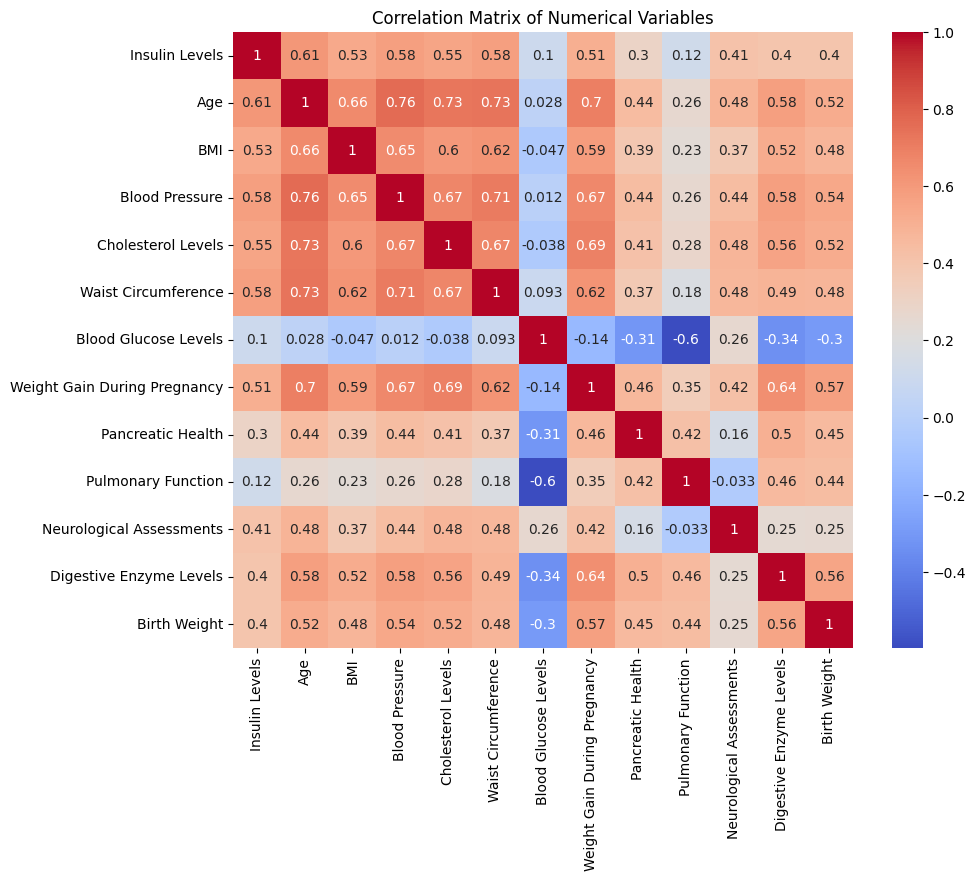

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df[numerical_columns].corr(), cmap='coolwarm', annot = True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix['Target'].sort_values(ascending=False)

,Target
Target,1.000000
Blood Glucose Levels,0.652425
Neurological Assessments,0.238511
Blood Pressure,0.050899
Waist Circumference,0.046651
Glucose Tolerance Test,0.007535
Early Onset Symptoms,0.004555
Genetic Markers,0.004078
Physical Activity,0.002664
Socioeconomic Factors,0.002260


In [ ]:
new_df = df.drop(columns=["Autoantibodies", "Previous Gestational Diabetes", "Urine Test", "Alcohol Consumption", "Dietary Habits", "Genetic Testing", "Cystic Fibrosis Diagnosis", "Environmental Factors", "History of PCOS", "Insulin Levels", "BMI", "Weight Gain During Pregnancy", "Pancreatic Health", "Birth Weight", "Digestive Enzyme Levels", "Pulmonary Function", "Cholesterol Levels"])


In [ ]:
new_df.head()

,Target,Genetic Markers,Family History,Age,Physical Activity,Blood Pressure,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Glucose Tolerance Test,Pregnancy History,Steroid Use History,Neurological Assessments,Liver Function Tests,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,No,44,High,124,50,168,Low Risk,Medium,Smoker,Normal,Normal,No,3,Normal,No
1,Neonatal Diabetes Mellitus (NDM),Positive,No,1,High,73,24,178,Low Risk,High,Non-Smoker,Normal,Normal,No,1,Normal,Yes
2,Prediabetic,Positive,Yes,36,High,121,36,105,Low Risk,Medium,Smoker,Abnormal,Normal,No,1,Abnormal,Yes
3,Type 1 Diabetes,Negative,No,7,Low,100,29,121,Low Risk,High,Smoker,Abnormal,Normal,No,2,Abnormal,No
4,Wolfram Syndrome,Negative,Yes,10,High,103,33,289,Low Risk,Low,Smoker,Normal,Complications,No,1,Normal,No


In [ ]:
new_df.columns

Index(['Target', 'Genetic Markers', 'Family History', 'Age',
       'Physical Activity', 'Blood Pressure', 'Waist Circumference',
       'Blood Glucose Levels', 'Ethnicity', 'Socioeconomic Factors',
       'Smoking Status', 'Glucose Tolerance Test', 'Pregnancy History',
       'Steroid Use History', 'Neurological Assessments',
       'Liver Function Tests', 'Early Onset Symptoms'],
      dtype='object')

In [ ]:
new_df.shape

(70000, 17)

In [ ]:
categorical_columns = new_df.select_dtypes(include=['object']).columns
numerical_columns = new_df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
new_df[categorical_columns].head()

,Target,Genetic Markers,Family History,Physical Activity,Ethnicity,Socioeconomic Factors,Smoking Status,Glucose Tolerance Test,Pregnancy History,Steroid Use History,Liver Function Tests,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,No,High,Low Risk,Medium,Smoker,Normal,Normal,No,Normal,No
1,Neonatal Diabetes Mellitus (NDM),Positive,No,High,Low Risk,High,Non-Smoker,Normal,Normal,No,Normal,Yes
2,Prediabetic,Positive,Yes,High,Low Risk,Medium,Smoker,Abnormal,Normal,No,Abnormal,Yes
3,Type 1 Diabetes,Negative,No,Low,Low Risk,High,Smoker,Abnormal,Normal,No,Abnormal,No
4,Wolfram Syndrome,Negative,Yes,High,Low Risk,Low,Smoker,Normal,Complications,No,Normal,No


In [ ]:
new_df[numerical_columns].head()

,Target,Genetic Markers,Family History,Age,Physical Activity,Blood Pressure,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Glucose Tolerance Test,Pregnancy History,Steroid Use History,Neurological Assessments,Liver Function Tests,Early Onset Symptoms
0,7,1,0,0.569277,0,0.634773,2.197183,0.151527,1,2,1,1,1,0,1.758207,1,0
1,4,1,0,-1.474156,0,-1.922277,-1.624429,0.359146,1,0,0,1,1,0,-1.182325,1,1
2,5,1,1,0.189103,0,0.484358,0.139392,-1.156471,1,2,1,0,1,0,-1.182325,0,1
3,8,0,0,-1.189026,1,-0.568545,-0.889503,-0.824281,1,0,1,0,1,0,0.287941,0,0
4,12,0,1,-1.046461,0,-0.418130,-0.301563,2.663714,1,1,1,1,0,0,-1.182325,1,0


**Encoding and Standardization**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,1,0,0,1,40,44,38,0,0,...,76,0,0,1,3,1,56,1,2629,0
1,4,1,0,0,1,13,1,17,0,0,...,60,1,0,0,1,1,28,0,1881,1
2,5,1,1,1,1,27,36,24,0,1,...,80,1,0,0,1,0,55,1,3622,1
3,8,0,1,0,1,8,7,16,1,1,...,89,1,0,1,2,0,60,1,3542,0
4,12,0,0,1,1,17,10,17,0,0,...,41,0,0,1,1,1,24,3,1770,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,1,0,0,1,40,0.569277,38,0,0,...,76,0,0,1,1.758207,1,56,1,2629,0
1,4,1,0,0,1,13,-1.474156,17,0,0,...,60,1,0,0,-1.182325,1,28,0,1881,1
2,5,1,1,1,1,27,0.189103,24,0,1,...,80,1,0,0,-1.182325,0,55,1,3622,1
3,8,0,1,0,1,8,-1.189026,16,1,1,...,89,1,0,1,0.287941,0,60,1,3542,0
4,12,0,0,1,1,17,-1.046461,17,0,0,...,41,0,0,1,-1.182325,1,24,3,1770,0


**Split dataset for Training and Testing**

In [ ]:
X = df.drop('Target', axis='columns')
y = df.Target

In [ ]:
X.head()

,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,1,0,0,1,1.705261,0.569277,2.197644,0,0,0.634773,...,0.479322,0,0,1,1.758207,1,0.494018,1,-0.655702,0
1,1,0,0,1,-0.798037,-1.474156,-1.294096,0,0,-1.922277,...,-0.857855,1,0,0,-1.182325,1,-0.949955,0,-1.703567,1
2,1,1,1,1,0.499969,0.189103,-0.130183,0,1,0.484358,...,0.813616,1,0,0,-1.182325,0,0.442447,1,0.735381,1
3,0,1,0,1,-1.261610,-1.189026,-1.460369,1,1,-0.568545,...,1.565777,1,0,1,0.287941,0,0.700299,1,0.623310,0
4,0,0,1,1,-0.427178,-1.046461,-1.294096,0,0,-0.418130,...,-2.445751,0,0,1,-1.182325,1,-1.156237,3,-1.859066,0


In [ ]:
y

,Target
0,7
1,4
2,5
3,8
4,12
...,...
69995,7
69996,2
69997,8
69998,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 33), (14000, 33), (56000,), (14000,))

**Model Apply**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

results = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "Model": clf,
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": report,
    }

    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
accuracy_results = {name: result["Accuracy"] for name, result in results.items()}
accuracy_results


Training Logistic Regression...
Logistic Regression Accuracy: 0.42
              precision    recall  f1-score   support

           0       0.31      0.25      0.28      1070
           1       0.32      0.23      0.27      1072
           2       0.33      0.35      0.34      1072
           3       0.37      0.33      0.35      1194
           4       0.60      0.74      0.66      1018
           5       0.39      0.50      0.44      1089
           6       0.31      0.26      0.28      1053
           7       0.38      0.41      0.39      1048
           8       0.57      0.67      0.62      1123
           9       0.47      0.52      0.50      1083
          10       0.38      0.40      0.39      1064
          11       0.45      0.38      0.41      1063
          12       0.46      0.40      0.43      1051

    accuracy                           0.42     14000
   macro avg       0.41      0.42      0.41     14000
weighted avg       0.41      0.42      0.41     14000

Training Dec

{'Logistic Regression': 0.41835714285714287,
 'Decision Tree': 0.8606428571428572,
 'Random Forest': 0.8995714285714286,
 'K-Nearest Neighbors': 0.45714285714285713,
 'Naive Bayes': 0.8265,
 'Support Vector Machine': 0.29214285714285715,
 'AdaBoost': 0.22385714285714287,
 'Gradient Boosting': 0.8989285714285714}

**Model Evaluation**

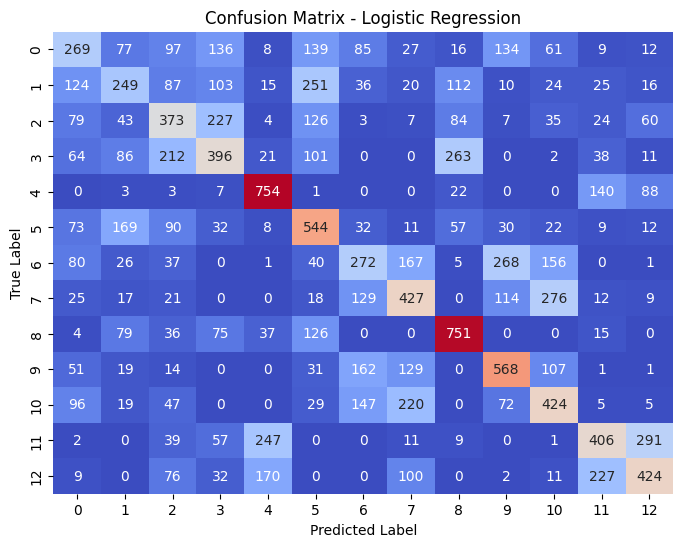

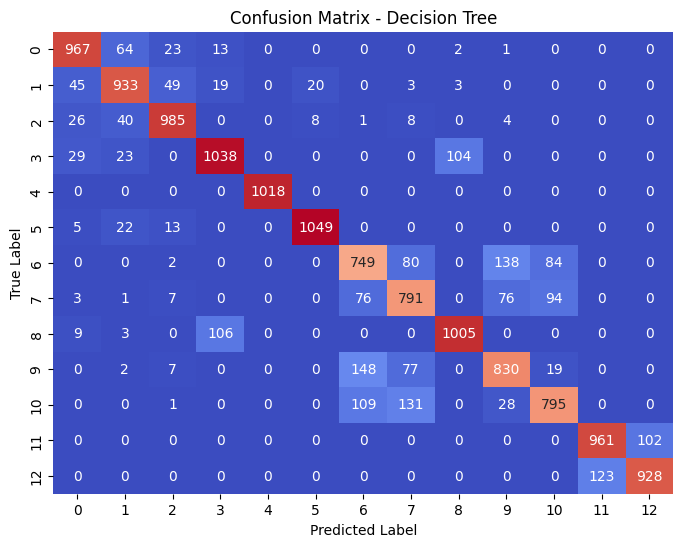

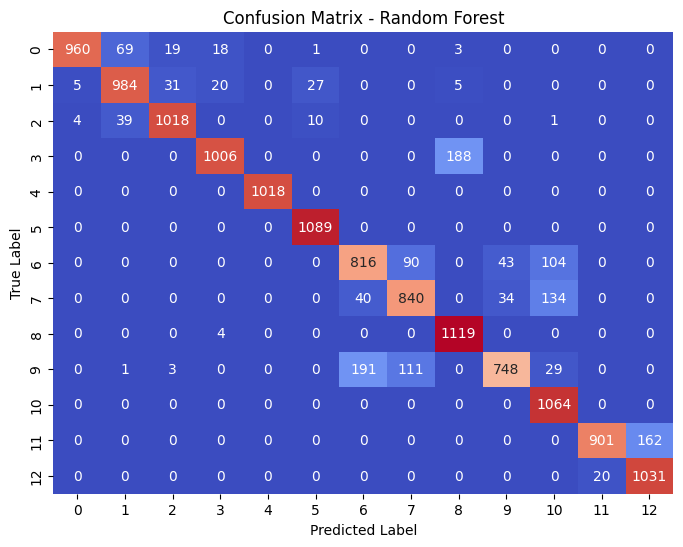

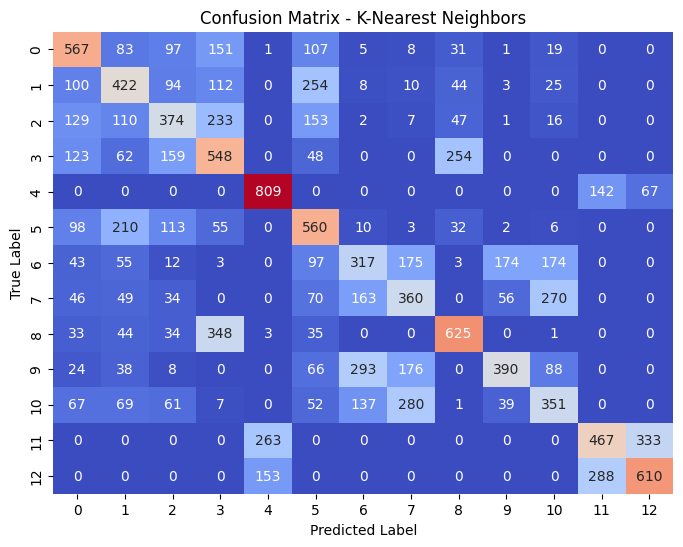

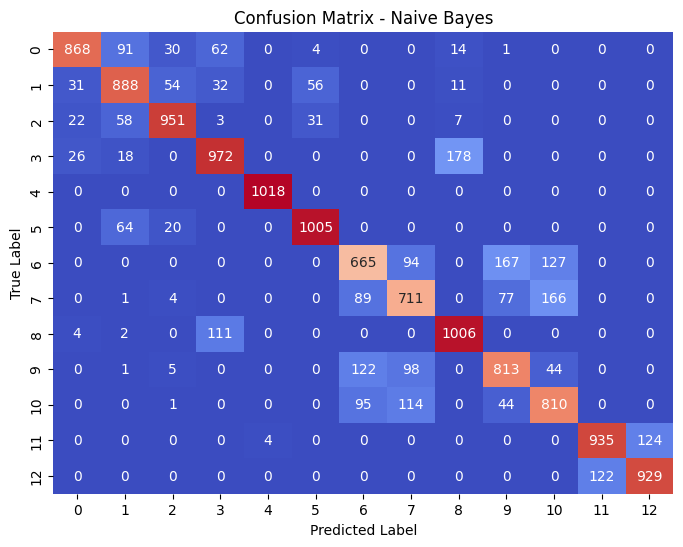

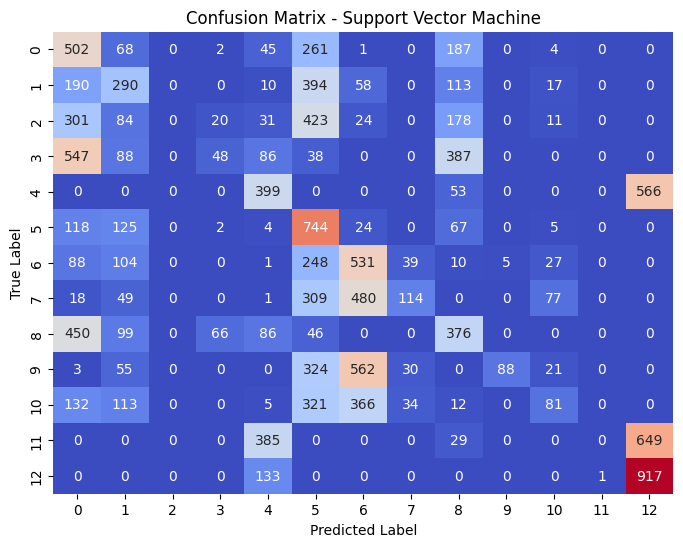

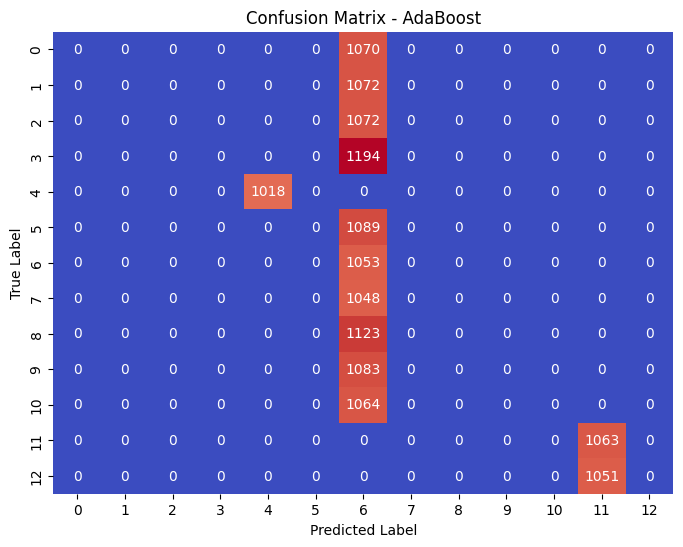

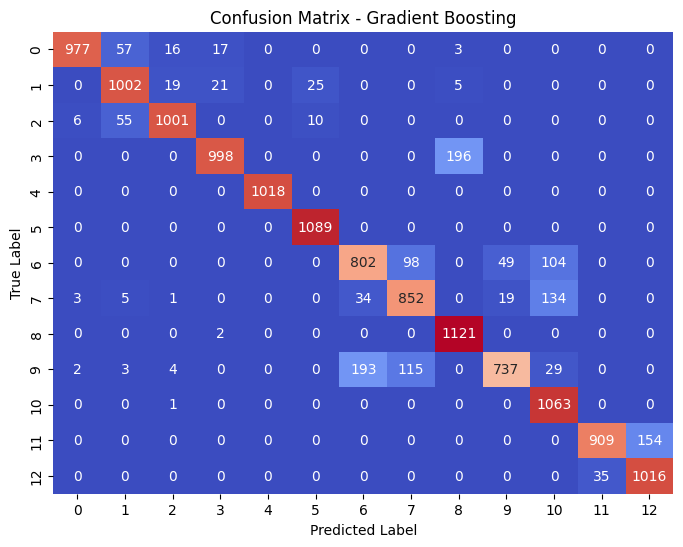

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_heatmap(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


for model_name, result in results.items():
    plot_confusion_matrix_heatmap(
        result["Model"], X_test, y_test, title=f"Confusion Matrix - {model_name}"
    )


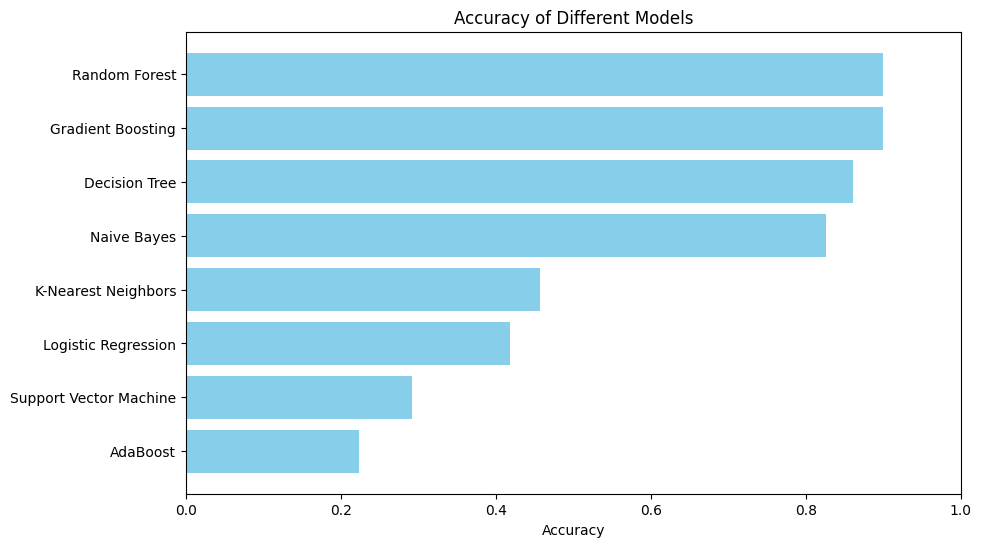

In [ ]:
import matplotlib.pyplot as plt

accuracy_results = {name: result["Accuracy"] for name, result in results.items()}

sorted_accuracies = dict(sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.barh(list(sorted_accuracies.keys()), list(sorted_accuracies.values()), color='skyblue')


plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()


**Applying Model After Feature Selection**

In [ ]:
X = new_df.drop('Target', axis='columns')
y = new_df.Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 16), (14000, 16), (56000,), (14000,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),

}

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Score: {model.score(X_test, y_test)}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.60
Logistic Regression Score: 0.6022857142857143
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1070
           1       0.52      0.54      0.53      1072
           2       0.64      0.56      0.60      1072
           3       0.57      0.56      0.56      1194
           4       0.97      1.00      0.98      1018
           5       0.64      0.71      0.67      1089
           6       0.45      0.45      0.45      1053
           7       0.48      0.40      0.43      1048
           8       0.57      0.58      0.57      1123
           9       0.45      0.56      0.50      1083
          10       0.46      0.39      0.42      1064
          11       0.79      0.77      0.78      1063
          12       0.82      0.82      0.82      1051

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'{name}: RMSE = {rmse}')

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])
print(results_df.sort_values(by='RMSE'))

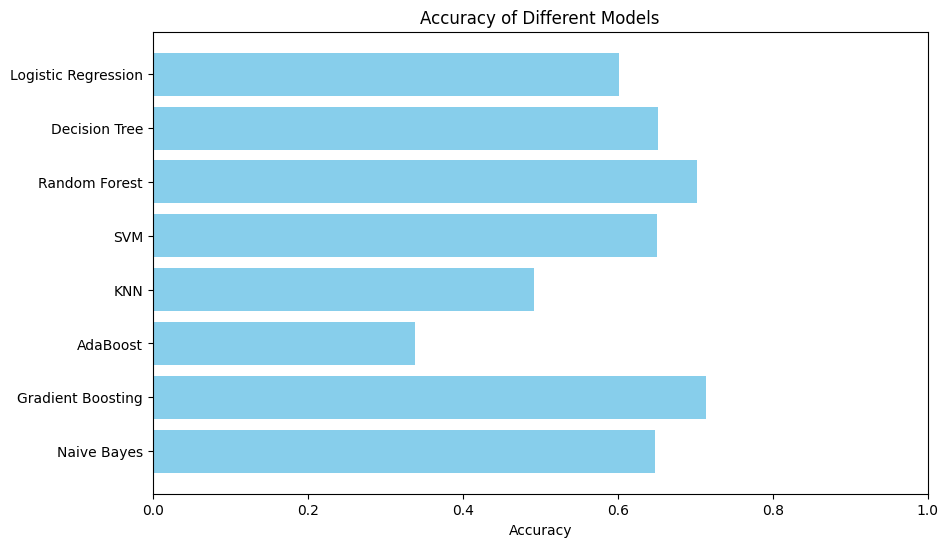

In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy


plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

**Feature Engineering**

In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

selected_columns = ['Insulin Levels', 'BMI', 'Age', 'Blood Glucose Levels', 'Waist Circumference', 'Blood Pressure']

X = df1[selected_columns]

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

X_poly = poly.fit_transform(X)

poly_feature_names = poly.get_feature_names_out(selected_columns)

df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

df1 = pd.concat([df1, df_poly], axis=1)

df1.head()


,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Age^2,Age Blood Glucose Levels,Age Waist Circumference,Age Blood Pressure,Blood Glucose Levels^2,Blood Glucose Levels Waist Circumference,Blood Glucose Levels Blood Pressure,Waist Circumference^2,Waist Circumference Blood Pressure,Blood Pressure^2
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,1936.0,7392.0,2200.0,5456.0,28224.0,8400.0,20832.0,2500.0,6200.0,15376.0
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,1.0,178.0,24.0,73.0,31684.0,4272.0,12994.0,576.0,1752.0,5329.0
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,1296.0,3780.0,1296.0,4356.0,11025.0,3780.0,12705.0,1296.0,4356.0,14641.0
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,49.0,847.0,203.0,700.0,14641.0,3509.0,12100.0,841.0,2900.0,10000.0
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,100.0,2890.0,330.0,1030.0,83521.0,9537.0,29767.0,1089.0,3399.0,10609.0


In [ ]:
df1.shape

(70000, 61)

**Apply Model**

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop('Target', axis='columns')
y = df1.Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 60), (14000, 60), (56000,), (14000,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),

}

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Score: {model.score(X_test, y_test)}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.54
Logistic Regression Score: 0.5420714285714285
              precision    recall  f1-score   support

           0       0.48      0.56      0.52      1070
           1       0.37      0.34      0.35      1072
           2       0.58      0.43      0.50      1072
           3       0.51      0.47      0.49      1194
           4       0.76      0.66      0.70      1018
           5       0.54      0.75      0.63      1089
           6       0.45      0.56      0.50      1053
           7       0.49      0.42      0.45      1048
           8       0.59      0.59      0.59      1123
           9       0.55      0.43      0.48      1083
          10       0.49      0.50      0.49      1064
          11       0.57      0.55      0.56      1063
          12       0.71      0.79      0.75      1051

    accuracy                           0.54     14000
   macro avg       0.55      0.54      0.54     14000
weighted avg       0.

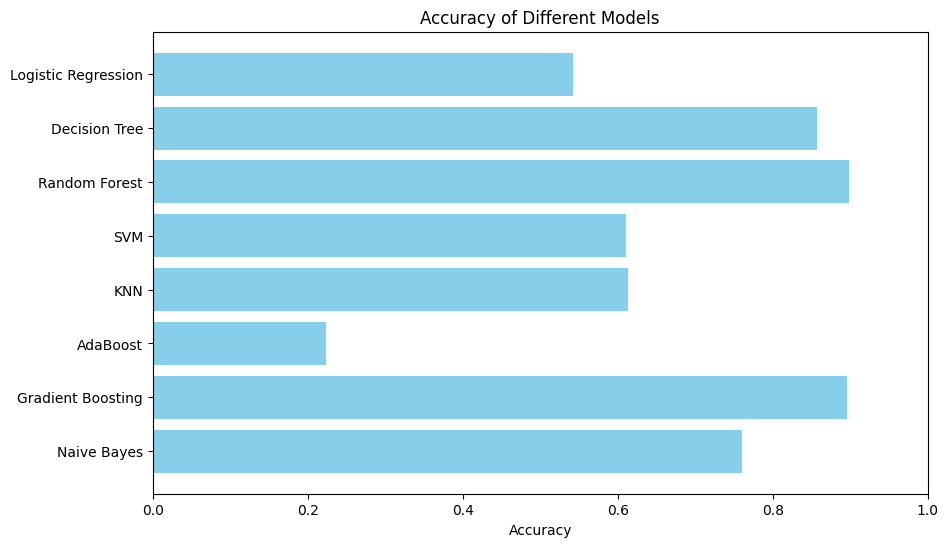

In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy


plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

**Advance Steps**

**K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# K=10
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print(f"Cross-Validation Accuracy for each fold: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.2f}")
print(f"Standard Deviation: {np.std(cv_results):.2f}")

Cross-Validation Accuracy for each fold: [0.89814286 0.89757143 0.90528571 0.90228571 0.90142857 0.89985714
 0.895      0.90485714 0.89657143 0.89414286]
Mean Accuracy: 0.90
Standard Deviation: 0.00


**Dimensionality Reduction with PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))


Accuracy after PCA: 0.48592857142857143


**Comparison of validation and Test Accuracy**

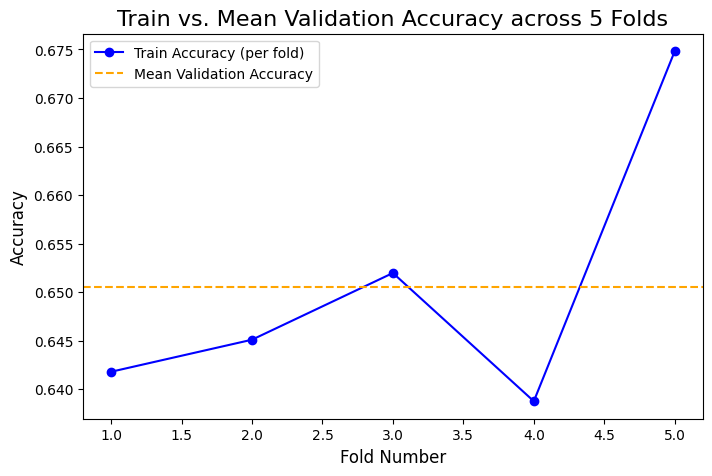

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

train_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

validation_accuracy = train_accuracy.mean()

plt.figure(figsize=(8, 5))

plt.plot(range(1, 6), train_accuracy, label='Train Accuracy (per fold)', marker='o', linestyle='-', color='blue')

plt.axhline(y=validation_accuracy, label='Mean Validation Accuracy', color='orange', linestyle='--')

plt.title('Train vs. Mean Validation Accuracy across 5 Folds', fontsize=16)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.legend()

plt.show()


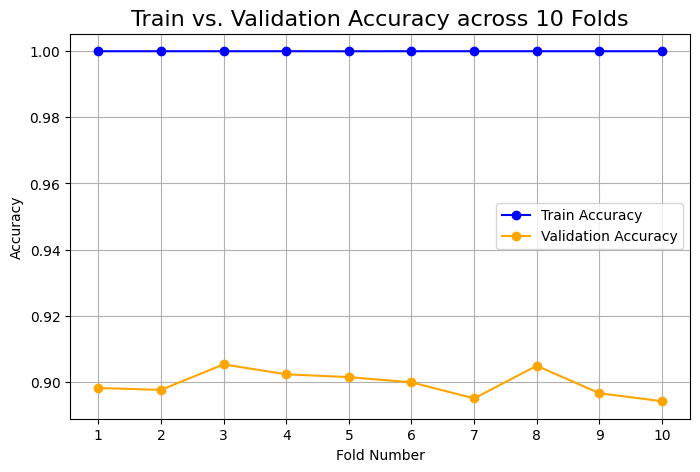

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []

for train_index, val_index in kfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy', marker='o', linestyle='-', color='orange')
plt.title('Train vs. Validation Accuracy across 10 Folds', fontsize=16)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()


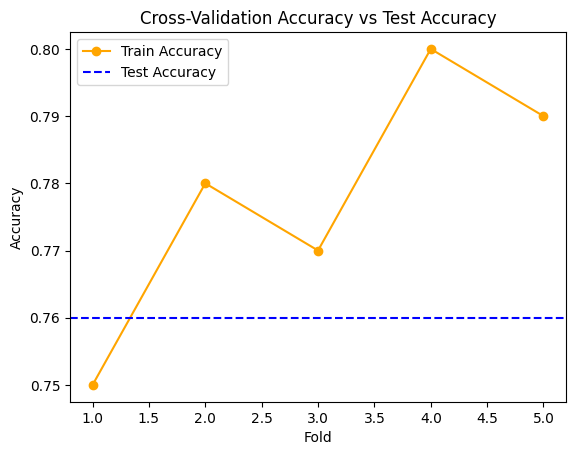

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = [0.75, 0.78, 0.77, 0.80, 0.79]
test_accuracy = 0.76

test_accuracy_arr = np.full_like(train_accuracy, test_accuracy)

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy', marker='o', linestyle='-', color='orange')

plt.axhline(test_accuracy, color='blue', linestyle='--', label='Test Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy vs Test Accuracy')
plt.legend()

plt.show()